# Hypothesis Testing with Men's and Women's Soccer Matches 

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Start your code here!
import pandas as pd
import pingouin

men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

print(men.shape, women.shape)

(44353, 7) (4884, 7)


In [2]:
men['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [3]:
# filter for only FIFA World Cup matches since 2002-01-01
men_fifa = men[(men['tournament'] == 'FIFA World Cup') & (men['date'] >= '2002-01-01')]
women_fifa = women[(women['tournament'] == 'FIFA World Cup') & (women['date'] >= '2002-01-01')]

men_fifa.head(50)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
25169,25169,2002-06-02,England,Sweden,1,1,FIFA World Cup
25170,25170,2002-06-02,Paraguay,South Africa,2,2,FIFA World Cup
25171,25171,2002-06-02,Spain,Slovenia,3,1,FIFA World Cup
25172,25172,2002-06-03,Brazil,Turkey,2,1,FIFA World Cup
25173,25173,2002-06-03,Croatia,Mexico,0,1,FIFA World Cup


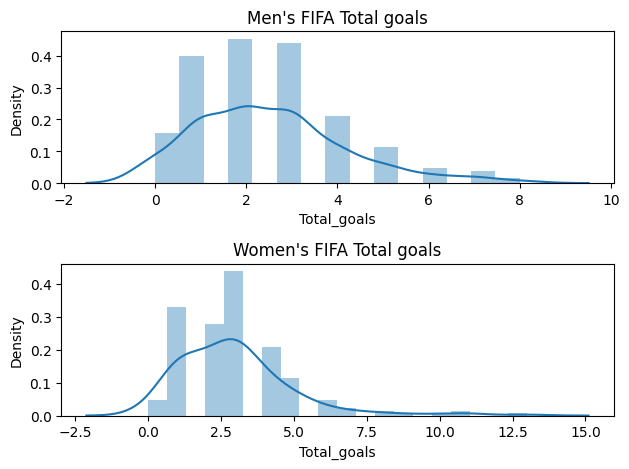

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a column that sums up both goals from home and away team 
men_fifa["Total_goals"] = men_fifa["home_score"] + men_fifa["away_score"]
women_fifa["Total_goals"] = women_fifa["home_score"] + women_fifa["away_score"]
# Assuming men_fifa and women_fifa are predefined dataframes with the columns 'home_score' and 'away_score'

fig, ax = plt.subplots(2)  # Corrected to unpack the tuple correctly
sns.distplot(men_fifa["Total_goals"], ax=ax[0])
sns.distplot(women_fifa["Total_goals"], ax=ax[1])
# Corrected to use women_fifa for women's away score

ax[0].set_title("Men's FIFA Total goals")
ax[1].set_title("Women's FIFA Total goals")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [5]:
# Hypothesis test
t_test = pingouin.ttest(x=men_fifa["Total_goals"],
                       y=women_fifa["Total_goals"],
                       paired=False,
                       alternative='two-sided')
t_test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.812823,340.102801,two-sided,0.005196,"[-0.79, -0.14]",0.261228,4.463,0.848673


In [7]:
def results(test):
    p_val = test["p-val"].item()  # Use .item() to extract a single value from a pandas Series
    significant_level = 0.1
    if p_val < significant_level:
       result = "reject"
    else:
        result = "fail to reject"  # Fixed: result should be assigned a value, not called as a function
    result_dict = {"p_val": p_val, "result": result}
    return result_dict

result_dict = results(t_test)

print(result_dict)
# Assuming t_test is defined somewhere above this code block


{'p_val': 0.0051961448009743005, 'result': 'reject'}
